In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/content/Mall_Customers.csv")
data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**Data Preprocessing**

In [5]:
data.count().isnull()

,0
CustomerID,False
Gender,False
Age,False
Annual Income (k$),False
Spending Score (1-100),False


In [6]:
data.duplicated().any()

np.False_

In [7]:
data.duplicated().sum()

np.int64(0)

The dataset is well prepared and cleaned

**Outliers**

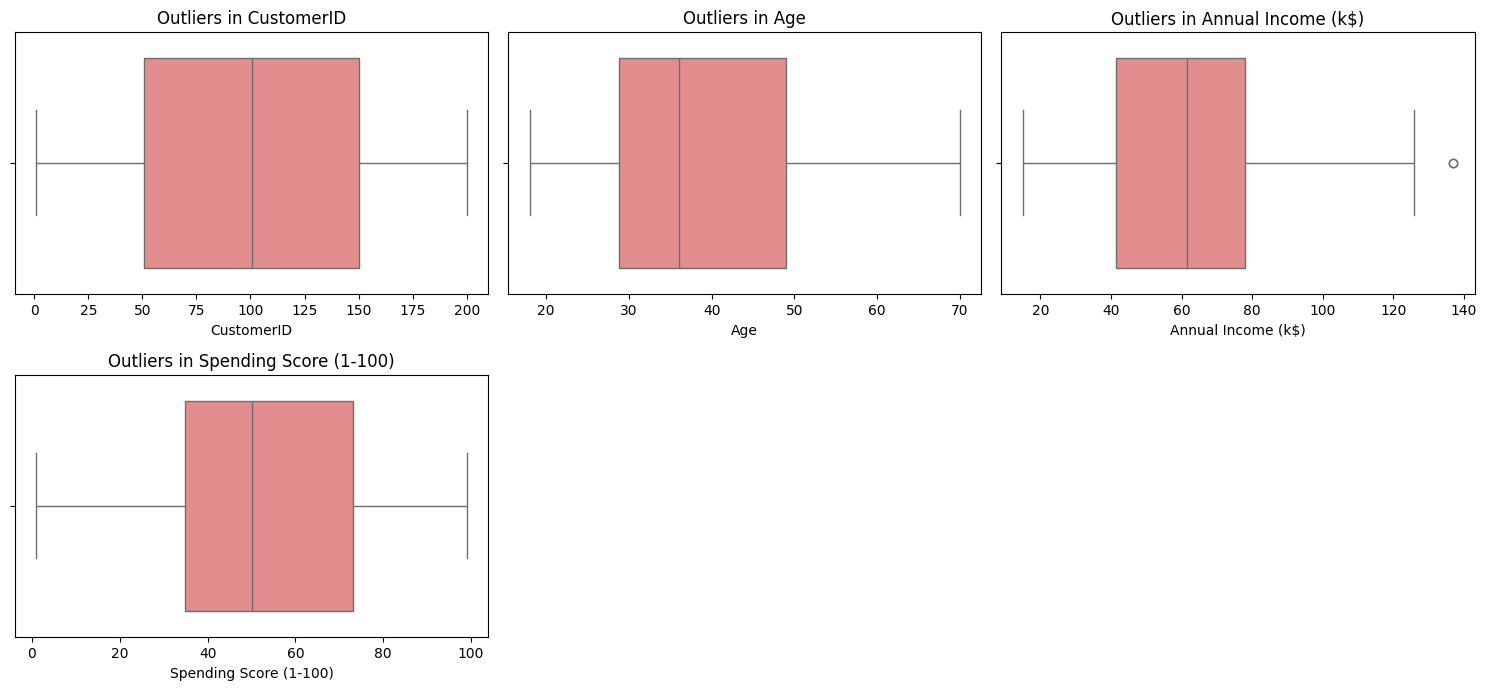

In [8]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=data[col], color='lightcoral')
    plt.title(f'Outliers in {col}')

plt.tight_layout()
plt.show()

👆🏻Comment: we can see an outlier in the annual income which above the upper range

Cluster customers into segments based on income and spending score

Perform scaling and visual exploration of groupings

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

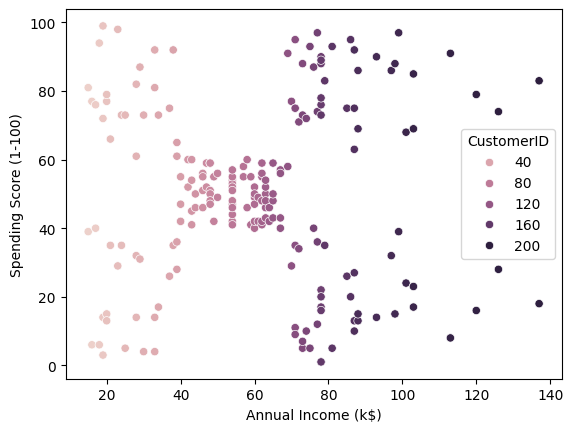

In [9]:
import seaborn as sns

sns.scatterplot(data = data, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'CustomerID')

Apply K-Means clustering and determine optimal number of clusters

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[['Annual Income (k$)', 'Spending Score (1-100)']],
                                      data[['CustomerID']], test_size=0.33, random_state=0)

In [12]:
from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

In [15]:
kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

KMeans(n_clusters=3, random_state=0)

Visualize clusters using 2D plots

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

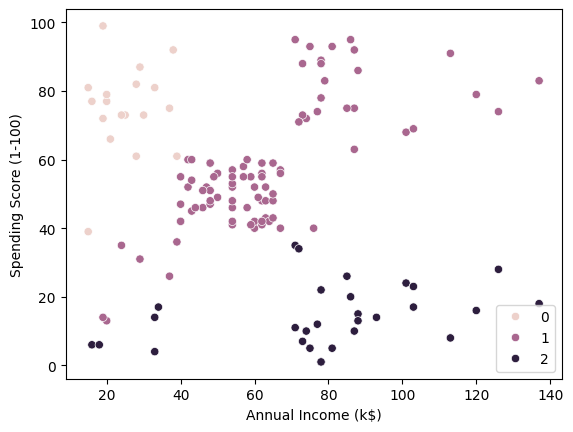

In [16]:
sns.scatterplot(data = X_train, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = kmeans.labels_)

👆🏻Comment: as we can see that the data are now clearly split into 3 distinct groups

<Axes: ylabel='CustomerID'>

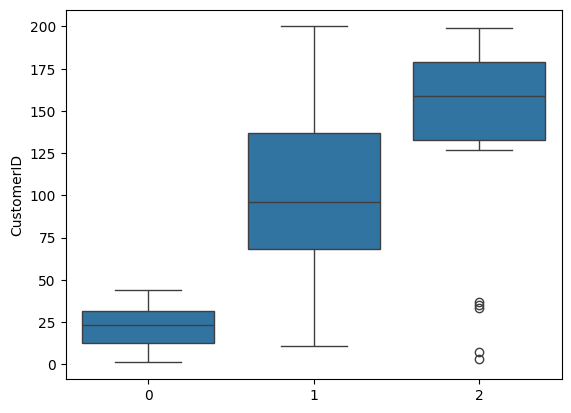

In [17]:
sns.boxplot(x = kmeans.labels_, y = y_train['CustomerID'])

👆🏻Comment: We can also look at the distribution of the customers in these 3 groups using a boxplot.

In [18]:
from sklearn.metrics import silhouette_score

silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')

np.float64(0.6836483492432235)

👆🏻Comment: we can evaluate the performance of the clustering algorithm using a Silhouette score which is a part of sklearn.metrics where a lower score represents a better fit.